# CNN  연습

*   Keras 패키지의 손글씨 MNIST 예제 데이터셋을 다운로드하세요.
*   예제 데이터셋의 일부(예: 100개)를 시각화해 보세요.
*   훈련 셋과 테스트 셋의 데이터는 0. ~ 1. 스케일로 스케일링하세요.
*   전체 훈련 셋은 다시 훈련 셋과 검증 셋으로 나누세요.
*   아래의 CNN 모델 구조처럼 합성곱 신경망을 설계하세요.
*   모든 합성곱 층의 커널 사이즈는 3으로 설정하세요
*   모든 합성곱 층(Conv2D)와 출력층을 제외한 밀집층(Dense)에서
    *   활성화 함수는 ReLU로 설정하세요.
    *   커널 초기화 함수(kernel initialize)를 'he_normal'로 설정하세요.
*   첫번째 Dropout 층의 rate는 0.25로 설정하세요.
*   두번째 Dropout 층의 rate는 0.5로 설정하세요.
*   모델의 옵티마이저(optimizer)는 Nadam을 사용하세요.
*   ModelCheckpoint, EarlyStopping 콜백들과 검증 셋을 함께 사용해서 모델을 훈련하세요.
    *   최적의 모델은 cnn_ex_best.keras 파일로 저장하세요.
*   모델의 성능을 평가하세요.

---

__CNN example__

<img src="https://raw.githubusercontent.com/JakeOh/202505_BD50/refs/heads/main/lab_da/cnn_example_64dpi.png" alt="CNN example" />


# Import

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import convolve, convolve2d, correlate, correlate2d
from sklearn.datasets import load_sample_image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Data set

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 데이터 셋 일부(100개) 시각화

In [26]:
def plot_fashion_mnist(arr, ncols= 10):

    n = len(arr)
    nrows = int(np.ceil(n/ ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize= (ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1 or ncols == 1:
                if idx < n:
                    ax[idx].imshow(arr[idx], cmap = plt.cm.binary)
                ax[idx].axis('off')
            else:
                if idx < n:
                    ax[i,j].imshow(arr[idx], cmap= plt.cm.binary)
                ax[i,j].axis('off')

    plt.show()

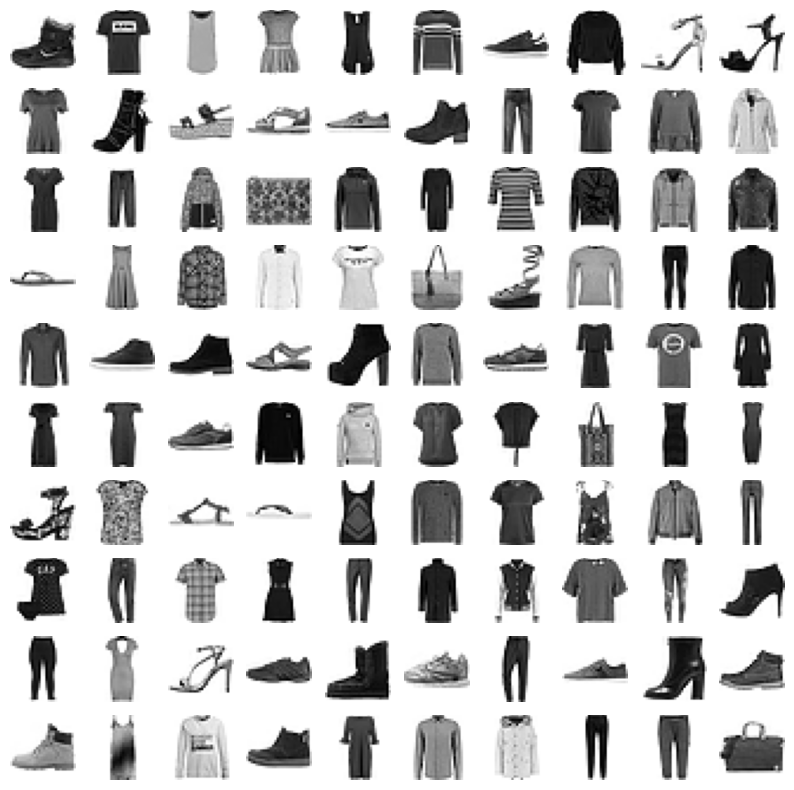

In [28]:
plot_fashion_mnist(X_train_full[:100])

# Scaling Test Set and Train Set to 0 ~ 1

In [29]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

y_train_full = y_train_full / 255.0
y_test = y_test /255.0


In [30]:
y_test

array([0.03529412, 0.00784314, 0.00392157, ..., 0.03137255, 0.00392157,
       0.01960784])

# Split train_full to train and validate

In [32]:
train_data, val_data, train_target, val_target = train_test_split(X_train_full, y_train_full, random_state= 42, test_size= 0.2, stratify = y_train_full)

In [33]:
print(train_data.shape)
print(train_target.shape)
print(np.unique(train_target, return_counts= True))

(48000, 28, 28)
(48000,)
(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412]), array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800]))


In [34]:
print(val_data.shape)
print(val_target.shape)
print(np.unique(val_target, return_counts= True))

(12000, 28, 28)
(12000,)
(array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412]), array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200]))


# 아래의 CNN 모델 구조처럼 합성곱 신경망을 설계하세요

In [35]:
he= 'he_normal'

In [36]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=3, padding="same",
                  activation="relu", kernel_initializer=he,
                  input_shape=(28,28,1)),
    layers.Conv2D(64, kernel_size=3, padding="same",
                  activation="relu", kernel_initializer=he),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu", kernel_initializer=he),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax", kernel_initializer=he)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compile

In [37]:
model.compile(
    optimizer=keras.optimizers.Nadam(),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[keras.metrics.sparse_categorical_accuracy])

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련

In [39]:
model_checkpoint = ModelCheckpoint(
    filepath="cnn_ex_best.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1)

In [40]:
early = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, mode="min", verbose=1)

In [43]:
history = model.fit(train_data, train_target, epochs= 30, batch_size= 32, validation_data=(val_data, val_target), callbacks=[model_checkpoint , early], verbose=1)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 3.4578e-09 - sparse_categorical_accuracy: 0.0997
Epoch 1: val_loss improved from inf to 0.00000, saving model to cnn_ex_best.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 171s 113ms/step - loss: 3.4605e-09 - sparse_categorical_accuracy: 0.0997 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 1.7649e-10 - sparse_categorical_accuracy: 0.1001
Epoch 2: val_loss did not improve from 0.00000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 199s 112ms/step - loss: 1.7650e-10 - sparse_categorical_accuracy: 0.1001 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 5.0117e-11 - sparse_categorical_accuracy: 0.0999
Epoch 3: val_loss did not improve from 0.00000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 204s 113ms/step - loss: 5.0105e-11 - sparse_categorical_accuracy: 0.0999 - val_loss: 0.0000e+00 - val_sparse_categor

In [46]:
best_model = keras.models.load_model("cnn_ex_best.keras")

In [48]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(test_loss)
print(test_acc)

0.0
0.10000000149011612


In [51]:
probs = best_model.predict(X_test, verbose=0)
y_pred = probs.argmax(axis=1)

In [56]:
probs

array([[9.9999994e-01, 0.0000000e+00, 4.7450023e-35, ..., 1.4427377e-38,
        7.2111506e-36, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.9999994e-01, 0.0000000e+00, 1.6896180e-36, ..., 0.0000000e+00,
        7.3364477e-38, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 8.8435902e-34, 8.8646846e-30, ..., 1.3203233e-32,
        9.1481334e-31, 6.1968234e-35]], dtype=float32)